(784, 10000) (1, 10000) (784, 1000) (1, 1000)


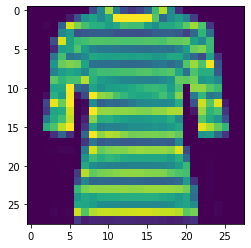

In [2]:
import numpy as np
import os
import pdb
import matplotlib.pyplot as plt
datasets_dir = 'C:/Users/binduri1/Downloads/'


def one_hot(x, n):
    if type(x) == list:
        x = np.array(x)
    x = x.flatten()
    o_h = np.zeros((len(x), n))
    o_h[np.arange(len(x)), x] = 1
    return o_h


def mnist(noTrSamples=1000, noTsSamples=100, \
                        digit_range=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], \
                        noTrPerClass=100, noTsPerClass=10):
    assert noTrSamples==noTrPerClass*len(digit_range), 'noTrSamples and noTrPerClass mismatch'
    assert noTsSamples==noTsPerClass*len(digit_range), 'noTrSamples and noTrPerClass mismatch'
    data_dir = os.path.join(datasets_dir, 'fashionmnist/')
    fd = open(os.path.join(data_dir, 'train-images-idx3-ubyte'))
    loaded = np.fromfile(file=fd, dtype=np.uint8)
    trData = loaded[16:].reshape((60000, 28*28)).astype(float)

    fd = open(os.path.join(data_dir, 'train-labels-idx1-ubyte'))
    loaded = np.fromfile(file=fd, dtype=np.uint8)
    trLabels = loaded[8:].reshape((60000)).astype(float)

    fd = open(os.path.join(data_dir, 't10k-images-idx3-ubyte'))
    loaded = np.fromfile(file=fd, dtype=np.uint8)
    tsData = loaded[16:].reshape((10000, 28*28)).astype(float)

    fd = open(os.path.join(data_dir, 't10k-labels-idx1-ubyte'))
    loaded = np.fromfile(file=fd, dtype=np.uint8)
    tsLabels = loaded[8:].reshape((10000)).astype(float)

    trData = trData/255.
    tsData = tsData/255.

    tsX = np.zeros((noTsSamples, 28*28))
    trX = np.zeros((noTrSamples, 28*28))
    tsY = np.zeros(noTsSamples)
    trY = np.zeros(noTrSamples)

    count = 0
    for ll in digit_range:
        # Train data
        idl = np.where(trLabels == ll)
        idl = idl[0][: noTrPerClass]
        idx = list(range(count*noTrPerClass, (count+1)*noTrPerClass))
        trX[idx, :] = trData[idl, :]
        trY[idx] = trLabels[idl]
        # Test data
        idl = np.where(tsLabels == ll)
        idl = idl[0][: noTsPerClass]
        idx = list(range(count*noTsPerClass, (count+1)*noTsPerClass))
        tsX[idx, :] = tsData[idl, :]
        tsY[idx] = tsLabels[idl]
        count += 1

    np.random.seed(1)
    test_idx = np.random.permutation(tsX.shape[0])
    tsX = tsX[test_idx,:]
    tsY = tsY[test_idx]

    trX = trX.T
    tsX = tsX.T
    trY = trY.reshape(1, -1)
    tsY = tsY.reshape(1, -1)
    return trX, trY, tsX, tsY


def main():
    trX, trY, tsX, tsY = mnist(noTrSamples=10000,
                               noTsSamples=1000, digit_range=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
                               noTrPerClass=1000, noTsPerClass=100)
    print(trX.shape,trY.shape,tsX.shape,tsY.shape)



    plt.imshow(trX[:,5].reshape(28, -1))
    trY[0,5]


if __name__ == "__main__":
    main()


